In [11]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df=pd.read_csv(city_data)
city_df.head()
ride_df=pd.read_csv(ride_data)
ride_df.head()




,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [12]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [13]:
# Combine the data into a single dataset
ridecity_df=pd.merge(ride_df,city_df, how="left", on=["city"])
# Display the data table for preview
ridecity_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [14]:
#Create Urban DF & get the ride_id count, avg fare, and driver count
urban_df=ridecity_df[ridecity_df["type"]=="Urban"]
urban_df

u_ride=urban_df.groupby(["city"]).count()["ride_id"]
u_fare=urban_df.groupby(["city"]).mean()["fare"]
u_drivercount=urban_df.groupby(["city"]).mean()["driver_count"]
urban_df=urban_df.set_index('city')['type']
urban_df
urban_city=pd.DataFrame({
    "Number of Rides": u_ride,
    "Average Fare": u_fare,
    "Number of Drivers": u_drivercount,
})
urban_city


,Number of Rides,Average Fare,Number of Drivers
city,,,
Amandaburgh,18,24.641667,12.0
Barajasview,22,25.332273,26.0
Carriemouth,27,28.314444,52.0
Christopherfurt,27,24.501852,41.0
Deanville,19,25.842632,49.0
East Kaylahaven,29,23.757931,65.0
Erikaland,12,24.906667,37.0
Grahamburgh,25,25.221200,61.0
Huntermouth,24,28.993750,37.0


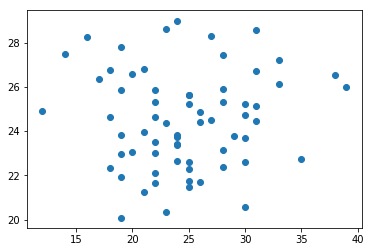

In [15]:
plt.scatter(urban_city["Number of Rides"], urban_city["Average Fare"])

In [16]:
#Create Subrurban DF & get the ride_id count, avg fare, and driver counts
suburban_df=ridecity_df[ridecity_df["type"]=="Suburban"]
sub_ride=suburban_df.groupby(["city"]).count()["ride_id"]
sub_fare=suburban_df.groupby(["city"]).mean()["fare"]
sub_drivercount=suburban_df.groupby(["city"]).mean()["driver_count"]

sub_city=pd.DataFrame({
    "Number of Rides": sub_ride,
    "Average Fare": sub_fare,
    "Number of Drivers": sub_drivercount,
})

sub_city

sub_city.sort_values("Number of Drivers", ascending=False)
                                                                     

,Number of Rides,Average Fare,Number of Drivers
city,,,
Josephside,27,32.858148,25.0
Lewishaven,12,25.241667,23.0
Colemanland,22,30.894545,23.0
Davidfurt,17,31.995882,23.0
Lake Scott,18,31.886111,23.0
Bethanyland,18,32.956111,22.0
East Danielview,17,31.560588,22.0
Lake Omar,14,28.075000,22.0
South Teresa,22,31.220455,21.0


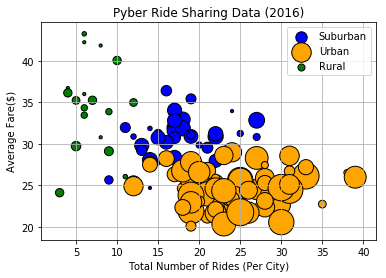

In [20]:
#Create Rural DF & get the ride_id count, avg fare, and driver counts
rural_df=ridecity_df[ridecity_df["type"]=="Rural"]
rural_ride= rural_df.groupby(["city"]).count()["ride_id"]
rural_fare= rural_df.groupby(["city"]).mean()["fare"]
rural_drivercount=rural_df.groupby(["city"]).mean()["driver_count"]
rural_city=pd.DataFrame({
    "Number of Rides":rural_ride,
    "Average Fare": rural_fare,
    "Number of Drivers": rural_drivercount,
})

rural_city

rural_city.sort_values("Number of Drivers", ascending=False)

plt.scatter(sub_city["Number of Rides"],sub_city["Average Fare"],s=sub_city["Number of Drivers"]*10,c="blue", edgecolor="black",label="Suburban")
plt.scatter(urban_city["Number of Rides"],urban_city["Average Fare"],s=urban_city["Number of Drivers"]*10, c="orange", edgecolor="black", label="Urban")
plt.scatter(rural_city["Number of Rides"],rural_city["Average Fare"],s=rural_city["Number of Drivers"]*10, c="green",edgecolor="black",label="Rural")

#add labels, legend
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.legend()
plt.grid()
plt.show()




In [ ]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

#odxb
# Incorporate a text label regarding circle size

# Save Figure


In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()